Generative Adversarial Networks (GANs)

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
df = pd.read_csv("/content/Cleaned-Data.csv")

In [3]:
df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


In [18]:
df['Country'].unique()

array(['China', 'Italy', 'Iran', 'Republic of Korean', 'France', 'Spain',
       'Germany', 'UAE', 'Other-EUR', 'Other'], dtype=object)

In [19]:
df['Country'].replace({'China': 1, 'Italy': 2, 'Iran': 3, 'Republic of Korean':4, 'France':5,
                     'Spain':6, 'Germany':7, 'UAE':8, 'Other-EUR':9, 'Other':10   }, inplace=True)

In [21]:
df['Country'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [22]:
# Separate features and target variable
X = df.iloc[:,0:26]
y = df.iloc[:,26]

In [23]:
X.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
0,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,0,0,0,0,1
1,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,0,0,0,1,0
2,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,0,0,1,0,0
3,1,1,1,1,1,0,1,1,1,1,...,0,1,0,0,1,0,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,0,1,0,0,0,1,0


In [24]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Country, dtype: int64

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Use 'sigmoid' for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", test_accuracy)

Epoch 1/10
6336/6336 [==============================] - 18s 3ms/step - loss: -8350664.5000 - accuracy: 0.0998 - val_loss: -28893122.0000 - val_accuracy: 0.1008
Epoch 2/10
6336/6336 [==============================] - 17s 3ms/step - loss: -83687200.0000 - accuracy: 0.0998 - val_loss: -159236688.0000 - val_accuracy: 0.1008
Epoch 3/10
6336/6336 [==============================] - 19s 3ms/step - loss: -288032032.0000 - accuracy: 0.0998 - val_loss: -444618848.0000 - val_accuracy: 0.1008
Epoch 4/10
6336/6336 [==============================] - 17s 3ms/step - loss: -674012480.0000 - accuracy: 0.0998 - val_loss: -936930560.0000 - val_accuracy: 0.1008
Epoch 5/10
6336/6336 [==============================] - 20s 3ms/step - loss: -1294605952.0000 - accuracy: 0.0998 - val_loss: -1688073088.0000 - val_accuracy: 0.1008
Epoch 6/10
6336/6336 [==============================] - 17s 3ms/step - loss: -2199168000.0000 - accuracy: 0.0998 - val_loss: -2747802624.0000 - val_accuracy: 0.1008
Epoch 7/10
6336/6336 [

In [29]:
predictions = model.predict(X_test)

1980/1980 [==============================] - 3s 1ms/step


Autoencoders

In [30]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [31]:
# Load the dataset
df = pd.read_csv("/content/Cleaned-Data.csv")

In [32]:
df['Country'].replace({'China': 1, 'Italy': 2, 'Iran': 3, 'Republic of Korean':4, 'France':5,
                     'Spain':6, 'Germany':7, 'UAE':8, 'Other-EUR':9, 'Other':10   }, inplace=True)

In [33]:
# Separate features and target variable
X = df.iloc[:,0:26]
y = df.iloc[:,26]

In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Standardize the feature values (optional but often helpful)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
# Define the VAE architecture
original_dim = X_train.shape[1]
latent_dim = 2

In [37]:
# Encoder
encoder_inputs = keras.layers.Input(shape=(original_dim,))
encoder_layer = keras.layers.Dense(128, activation='relu')(encoder_inputs)
z_mean = keras.layers.Dense(latent_dim)(encoder_layer)
z_log_var = keras.layers.Dense(latent_dim)(encoder_layer)

In [38]:
# Sampling layer
def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.keras.backend.random_normal(shape=(tf.shape(z_mean)[0], latent_dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = keras.layers.Lambda(sampling)([z_mean, z_log_var])

In [39]:
# Decoder
decoder_inputs = keras.layers.Input(shape=(latent_dim,))
decoder_layer = keras.layers.Dense(128, activation='relu')(decoder_inputs)
outputs = keras.layers.Dense(original_dim, activation='sigmoid')(decoder_layer)

In [40]:
# Build the VAE model
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name='encoder')
decoder = keras.Model(decoder_inputs, outputs, name='decoder')
vae_outputs = decoder(encoder(encoder_inputs)[2])
vae = keras.Model(encoder_inputs, vae_outputs, name='vae')

In [41]:
# Define the VAE loss
reconstruction_loss = tf.keras.losses.mean_squared_error(encoder_inputs, vae_outputs)
kl_loss = -0.5 * tf.reduce_mean(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
vae_loss = reconstruction_loss + kl_loss

vae.add_loss(vae_loss)

In [42]:
vae.compile(optimizer='adam')

# Train the VAE model
vae.fit(X_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
6336/6336 [==============================] - 23s 3ms/step - loss: 1.0039 - val_loss: 1.0000
Epoch 2/10
6336/6336 [==============================] - 19s 3ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 3/10
6336/6336 [==============================] - 19s 3ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 4/10
6336/6336 [==============================] - 21s 3ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 5/10
6336/6336 [==============================] - 18s 3ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 6/10
6336/6336 [==============================] - 20s 3ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 7/10
6336/6336 [==============================] - 20s 3ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 8/10
6336/6336 [==============================] - 19s 3ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 9/10
6336/6336 [==============================] - 21s 3ms/step - loss: 1.0000 - val_loss: 1.0000
Epoch 10/10
6336/6336 [==============================] - 19s 3ms/step - l

In [43]:
# Encode the data
encoded_X_train, _, _ = encoder.predict(X_train)
encoded_X_test, _, _ = encoder.predict(X_test)

# Build a disease prediction model using the encoded features
disease_model = keras.Sequential([
    keras.layers.Input(shape=(latent_dim,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Use 'sigmoid' for binary classification
])

disease_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the disease prediction model
disease_model.fit(encoded_X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = disease_model.evaluate(encoded_X_test, y_test)
print("Test accuracy:", test_accuracy)


1980/1980 [==============================] - 3s 2ms/step
Epoch 1/10
6336/6336 [==============================] - 19s 3ms/step - loss: -1379.4042 - accuracy: 0.0998 - val_loss: -3773.6150 - val_accuracy: 0.1008
Epoch 2/10
6336/6336 [==============================] - 16s 3ms/step - loss: -7807.1060 - accuracy: 0.0998 - val_loss: -12605.0010 - val_accuracy: 0.1008
Epoch 3/10
6336/6336 [==============================] - 14s 2ms/step - loss: -18947.5938 - accuracy: 0.0998 - val_loss: -25999.0488 - val_accuracy: 0.1008
Epoch 4/10
6336/6336 [==============================] - 15s 2ms/step - loss: -34596.8867 - accuracy: 0.0998 - val_loss: -43854.6172 - val_accuracy: 0.1008
Epoch 5/10
6336/6336 [==============================] - 16s 3ms/step - loss: -54705.8594 - accuracy: 0.0998 - val_loss: -66152.1953 - val_accuracy: 0.1008
Epoch 6/10
6336/6336 [==============================] - 17s 3ms/step - loss: -79212.4531 - accuracy: 0.0998 - val_loss: -92820.3359 - val_accuracy: 0.1008
Epoch 7/10
6336/

K-Means Clustering

In [44]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [45]:
# Load the dataset
df = pd.read_csv("/content/Cleaned-Data.csv")

In [46]:
# Select relevant features (exclude target variable)
X = df.drop(columns=["Country"])

In [47]:
# Standardize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

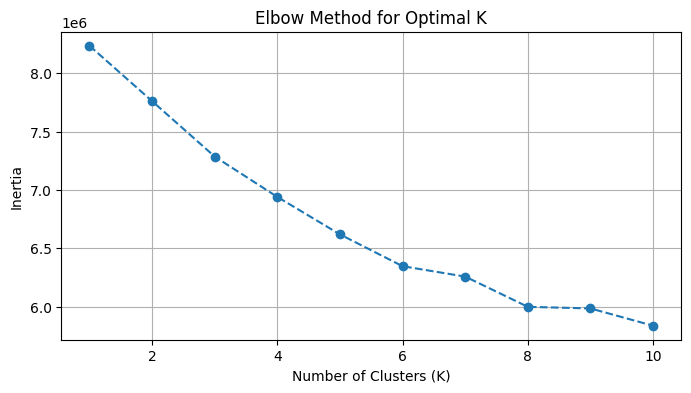

In [48]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid()
plt.show()


In [49]:
# Choose the optimal K (e.g., 3 clusters)
optimal_k = 6

# Perform K-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the original dataset
df['Cluster'] = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [53]:
df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country,Cluster
0,1,1,1,1,1,0,1,1,1,1,...,0,1,0,0,0,0,0,1,China,0
1,1,1,1,1,1,0,1,1,1,1,...,0,1,0,0,0,0,1,0,China,0
2,1,1,1,1,1,0,1,1,1,1,...,0,1,0,0,0,1,0,0,China,0
3,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,0,0,0,1,China,0
4,1,1,1,1,1,0,1,1,1,1,...,0,0,1,0,0,0,1,0,China,0
